In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from numba import njit
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import random


NameError: name 'asd' is not defined

In [2]:
def calculate_epsilon(T):
    epsilon_values = []
    
    for i in range(T):
        theta = -((1/1000000) ** (1/T)) + 1
        epsilon = (1 - theta) ** i
        epsilon_values.append(epsilon)
    
    return epsilon_values

# Parameters
T = 1000000 # iterations 
k = 6 # price interval 1/k
alpha = 0.3 # learning rate
delta = 0.95 # discount factor
epsilon = calculate_epsilon(T)
# initialising q-tables
q1 = np.zeros((k, k))
q2 = np.zeros((k, k))
p_table = np.linspace(1/k, 1, k)


In [3]:
def demand(p1t,p2t):
    """
    args:
        p1t: price of agent 1
        p2t: price of agent 2
    returns:
        d: demand for given set of prices
    """
    if p1t<p2t:
        d = 1-p1t
    elif p1t==p2t:
        d = 0.5*(1-p1t)
    else:
        d = 0
    return d


In [4]:
def profit(p1t, p2t):
    """
    args:
        p1t: index price of agent 1
        p2t: index price of agent 2
    returns:
        profit for agent
    """
    res=p_table[p1t] * demand(p_table[p1t], p_table[p2t])
    return res

In [5]:
np.random.choice(len(p_table))


0

In [6]:
def select_price_greedy(Q, current_s, p, it):
    """Epsilon-greedy action selection.
    args:
        Q: Q-function
        current_s: current state
        p: price vector containing the possible prices
        epsilon: probability of selecting an action uniformly at random
        u: draw from U(0,1) distribution
    returns:
        the index of selected action
    """
    u = random.uniform(0,1)
    #print("u: ", u)
    #print("epsilon: ", it)
    if u < it:
        #return np.random.choice(p)
        random_index = np.random.choice(len(p_table))
        return random_index
    else:
        #print(Q)
        max_idx = np.argmax(Q[np.where(p == current_s)[0][0], :])
        #max_idx = np.argmax(Q[current_s, :])
        return max_idx

## Q-function

In [7]:
def Q_func(p_it, s_t, q_table,iteration):
    """
    args
        p_it: current price index
        s_t: current state index
        q_table: q_table for 1 player
    returns:
        updated Q-table
    """
    #print("p_it: ", p_it)
    #print("s_t:", s_t)
    prev_est = q_table[p_it,s_t]
    s_t1 = select_price_greedy(q_table, p_table[s_t], p_table, epsilon[iteration])
    #print("st1=",s_t1)
    new_est = profit(p_it, s_t) + delta * profit(p_it, s_t1) + delta**2 * np.argmax(q_table[:,s_t1])
    q_table[p_it,s_t] = (1 - alpha) * prev_est + alpha * new_est
    return profit(s_t1,s_t)


In [8]:
print(Q_func(2, 2, q1, 2))

0.0


In [9]:
demand(0.1667,0.50)

0.8333

In [10]:
#print(p_table)
Q_func(1, 2, q1, 2)

0.22222222222222224

In [11]:

np.random.seed(2020)
def simulation(num_sim):
    SavedQFunc1=[]
    SavedQFunc2=[]
    all_profit1 = []
    all_profit2 = []
    for i in range(num_sim): 
        q1 = np.zeros((k, k))
        q2 = np.zeros((k, k))
        profit1=[]
        profit2=[]
        c_state = np.random.choice(len(p_table), replace=False)
        #print("start c_state:", c_state)
        for j in range(1,T):
            if j%2 == 1:
                p1 = select_price_greedy(q1, c_state, p_table, j)
                #print("p1:", p1)
                profit1.append(Q_func(p1, c_state, q1, j))
                c_state = p1
                #print("simulation c_state:", c_state)
            else:
                p2 = select_price_greedy(q2, c_state, p_table, j)
                #print("p2: ", p2)
                profit2.append(Q_func(p2, c_state, q2, j))
                c_state = p2
        
        SavedQFunc1.append(q1)
        SavedQFunc2.append(q2)
        all_profit1.extend(profit1)
        all_profit2.extend(profit2)
    return (SavedQFunc1,SavedQFunc2,all_profit1,all_profit2)


In [12]:
r1,r2,p1,p2=simulation(2)
print(r1[0])
print(r2[0])
print(r1[1])
print(r2[1])


[[2.00638889 1.17333333 2.07583333 2.07583333 2.07583333 2.07583333]
 [2.01611111 1.22472222 2.23833333 2.23833333 2.23833333 2.23833333]
 [2.0425     1.02125    2.1675     2.2925     2.2925     2.2925    ]
 [2.01611111 0.9025     1.91055556 2.12722222 2.23833333 2.23833333]
 [1.93694444 0.9025     1.805      1.87097222 2.00638889 2.07583333]
 [1.805      0.9025     1.805      1.805      1.805      1.805     ]]
[[1.10388889 1.17333333 2.07583333 2.07583333 2.07583333 1.17333333]
 [1.11361111 1.22472222 2.23833333 2.23833333 2.23833333 1.33583333]
 [1.02125    1.02125    2.1675     2.2925     2.2925     1.27125   ]
 [0.9025     0.9025     1.91055556 2.12722222 2.23833333 1.12472222]
 [0.9025     0.9025     1.805      1.87097222 1.94041667 1.04138889]
 [0.9025     0.9025     1.805      1.805      1.805      0.9025    ]]
[[1.10388889 1.17333333 2.07583333 2.07583333 2.07583333 1.17333333]
 [1.11361111 1.22472222 2.23833333 2.23833333 2.23833333 1.33583333]
 [1.02125    1.02125    2.1675  

In [13]:
print("profit1 \n",p1[0:500])
print("profit2 \n",p2[0:500])
# Hvorfor bliver vores q-tables ens for begge agenter også i forskellige simulationer
# 

profit1 
 [0.0, 0.1388888888888889, 0.0, 0.11111111111111112, 0.13888888888888887, 0.0, 0.0, 0.13888888888888887, 0.06944444444444443, 0.0, 0.22222222222222224, 0.1388888888888889, 0.1388888888888889, 0.11111111111111112, 0.0, 0.1388888888888889, 0.0, 0.11111111111111112, 0.1388888888888889, 0.125, 0.13888888888888887, 0.0, 0.22222222222222224, 0.0, 0.0, 0.1388888888888889, 0.0, 0.25, 0.22222222222222224, 0.0, 0.22222222222222224, 0.1388888888888889, 0.1388888888888889, 0.13888888888888887, 0.11111111111111112, 0.0, 0.0, 0.0, 0.1388888888888889, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1388888888888889, 0.22222222222222224, 0.13888888888888887, 0.0, 0.25, 0.22222222222222224, 0.1388888888888889, 0.22222222222222224, 0.1388888888888889, 0.0, 0.22222222222222224, 0.1388888888888889, 0.11111111111111112, 0.0, 0.0, 0.0, 0.0, 0.22222222222222224, 0.25, 0.22222222222222224, 0.0, 0.125, 0.25, 0.0, 0.22222222222222224, 0.0, 0.11111111111111112, 0.25, 0.13888888888888887, 0.0, 0.1388888888888889, 0.1388

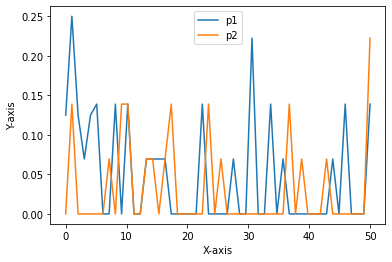

true
1000000


In [14]:
plt.plot(np.linspace(0,50,50),p1[99950:100000],label='p1')
plt.plot(np.linspace(0,50,50),p2[99950:100000],label='p2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()
if r1[0].all() == r2[0].all():
    print("true")
else: print("false")
print(len(p1))

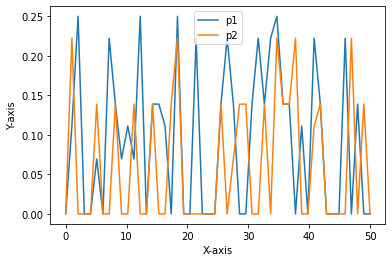

In [15]:
plt.plot(np.linspace(0,50,50),p1[100:150],label='p1')
plt.plot(np.linspace(0,50,50),p2[100:150],label='p2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

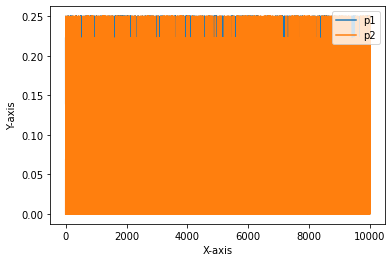

In [16]:
x_axis = np.linspace(0, 10000, 4998)

# Plotting
plt.plot(x_axis, p1[5000:9998], label='p1')
plt.plot(x_axis, p2[5000:9998], label='p2')

# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

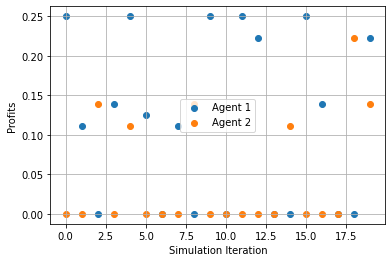

In [17]:
plt.scatter(range(len(p1[9950:9970])), p1[9950:9970], label='Agent 1')
plt.scatter(range(len(p2[9950:9970])), p2[9950:9970], label='Agent 2')
plt.xlabel('Simulation Iteration')
plt.ylabel('Profits')
plt.legend()
plt.grid()
plt.show()

In [18]:


def simulation(num_sim, last_iterations=1000):
    SavedQFunc1 = []
    SavedQFunc2 = []
    all_profit1 = []
    all_profit2 = []
    last_probabilities1 = []
    last_probabilities2 = []

    for i in range(num_sim): 
        q1 = np.zeros((k, k))
        q2 = np.zeros((k, k))
        profit1 = []
        profit2 = []
        c_state = np.random.choice(len(p_table), replace=False)

        for j in range(1, T):
            if j % 2 == 1:
                p1 = select_price_greedy(q1, c_state, p_table, j)
                profit1.append(Q_func(p1, c_state, q1, j))
                c_state = p1
            else:
                p2 = select_price_greedy(q2, c_state, p_table, j)
                profit2.append(Q_func(p2, c_state, q2, j))
                c_state = p2
        
        SavedQFunc1.append(q1)
        SavedQFunc2.append(q2)
        all_profit1.extend(profit1)
        all_profit2.extend(profit2)

        # Calculate average probabilities over the last `last_iterations`
        if j >= T - last_iterations:
            last_probabilities1.append(np.mean(profit1))
            last_probabilities2.append(np.mean(profit2))

    average_probability1 = np.mean(last_probabilities1)
    average_probability2 = np.mean(last_probabilities2)

    return SavedQFunc1, SavedQFunc2, all_profit1, all_profit2, average_probability1, average_probability2


In [19]:
r1,r2,p1,p2,ap1,ap2=simulation(10)
print(r1[0])
print(r2[0])
print(r1[1])
print(r2[1])

[[1.10388889 1.17333333 2.07583333 2.07583333 2.07583333 2.07583333]
 [1.11361111 1.22472222 2.23833333 2.23833333 2.23833333 2.23833333]
 [1.02125    1.02125    2.1675     2.2925     2.2925     2.2925    ]
 [0.9025     0.9025     2.01611111 2.12722222 2.23833333 2.23833333]
 [0.9025     0.9025     1.93694444 1.87097222 2.00638889 2.07583333]
 [0.9025     0.9025     1.805      1.805      1.805      1.805     ]]
[[1.10388889 2.07583333 2.07583333 2.07583333 2.07583333 1.17333333]
 [1.00805556 2.12722222 2.23833333 2.23833333 2.23833333 1.23027778]
 [0.9025     2.0425     2.1675     2.2925     2.2925     1.1525    ]
 [0.9025     1.91055556 1.91055556 2.12722222 2.23833333 1.12472222]
 [0.9025     1.805      1.805      1.87097222 1.94041667 1.04138889]
 [0.9025     1.805      1.805      1.805      1.805      0.9025    ]]
[[1.10388889 1.17333333 2.07583333 2.07583333 2.07583333 1.17333333]
 [1.11361111 1.22472222 2.23833333 2.23833333 2.23833333 1.33583333]
 [1.02125    1.02125    2.1675  

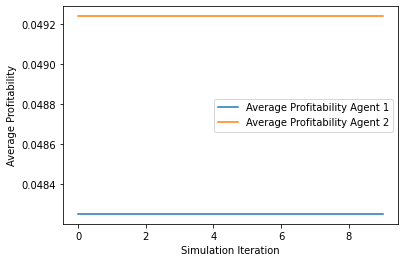

In [20]:
plt.plot(range(10), [ap1] * 10, label='Average Profitability Agent 1')
plt.plot(range(10), [ap2] * 10, label='Average Profitability Agent 2')
plt.xlabel('Simulation Iteration')
plt.ylabel('Average Profitability')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(2020)

def simulation(num_sim, T, last_iterations=1000):
    SavedQFunc1 = []
    SavedQFunc2 = []
    all_profit1 = []
    all_profit2 = []
    final_profitabilities1 = []
    final_profitabilities2 = []

    for i in range(num_sim): 
        q1 = np.zeros((k, k))
        q2 = np.zeros((k, k))
        profit1 = []
        profit2 = []
        price1=[]
        save=[]
        mean=0
        c_state = np.random.choice(len(p_table), replace=False)

        for j in range(1, T):
            if j % 2 == 1:
                p1 = select_price_greedy(q1, c_state, p_table, j)
                profit1.append(Q_func(p1, c_state, q1, j))
                c_state = p1
                price1.append(p1)
            else:
                p2 = select_price_greedy(q2, c_state, p_table, j)
                profit2.append(Q_func(p2, c_state, q2, j))
                c_state = p2
            if j==1000:
                mean=np.array([price1]).mean()
                save.append(mean)
                price1=[]
                mean=0
            save.append(save)
        SavedQFunc1.append(q1)
        SavedQFunc2.append(q2)
        all_profit1.extend(profit1)
        all_profit2.extend(profit2)


    return (
        SavedQFunc1, SavedQFunc2,
        all_profit1, all_profit2, save
    )
num_simulations = 1
simulation_length = 500000  # Adjust the simulation length as needed
(
    SavedQFunc1, SavedQFunc2,
    all_profit1, all_profit2, saved
) = simulation(num_simulations, simulation_length)

#
# Plotting
iterations = range(0, len(saved) * 1000, 1000)
plt.plot(iterations, saved, label='Avg Profitability Agent 1')
plt.plot(iterations, saved, label='Avg Profitability Agent 2')
plt.xlabel('Iteration (T)')
plt.ylabel('Average Profitability')
plt.legend()
plt.show()